In [1]:
#importing all the libraries
import pandas as pd                #To manipulate data of excel file
import numpy as np                 #r mathematical calculations
import matplotlib.pyplot as plt    # For plotting graphs
from datetime import datetime      # To access datetime
from pandas import Series          # To work on series
%matplotlib inline                 
import warnings                    # To ignore the warnings
warnings.filterwarnings("ignore")  #
from openpyxl import load_workbook #to load excel file into program
import glob                        # helps in dealing with computer paths
import os                          #to deal with computer operating system

## Clustering and Predicting based only on demand data (1D data)

In [2]:
#initializing train1 dataframe from data of first day of JAN month
train1=pd.read_excel("/home/yash/Work/training/df/hourly/up1.xlsx","1")
train1=train1.iloc[3:27,:]


In [3]:
#Initializing empty list to store MAX DEMAND OF each month
a1=[]


In [4]:
# Load the excel for month JAN 2017
wb = load_workbook(r"/home/yash/Work/training/df/hourly/up1.xlsx")

#iterate through sheets and append the data of all 31 days in a single dataframe train1

for sheet in wb.worksheets[1:]:
    sn=str(sheet.title)
    if(sn=="Sheet1"):
        break
    df=pd.read_excel("/home/yash/Work/training/df/hourly/up1.xlsx",sn)
    s=df.iloc[3:27,:]
    train1=train1.append(s)
        

a1.append(train1.values.max())        
train1

,Daily Hourly Demand Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,1,7213,3870.74,-169.718,10914,0,0,NaN,NaN,NaN,NaN,0,10914
4,2,6886,3598.7,-54.9825,10429.7,0,0,NaN,NaN,NaN,NaN,0,10429.7
5,3,6672,3561.22,101.498,10334.7,0,0,NaN,NaN,NaN,NaN,0,10334.7
6,4,6745,3563.56,107.16,10415.7,0,0,NaN,NaN,NaN,NaN,0,10415.7
7,5,6854,3597.29,293.933,10745.2,0,55,NaN,NaN,NaN,NaN,55,10800.2
8,6,7738,4398.31,-22.19,12114.1,0,-235,NaN,NaN,NaN,NaN,0,12114.1
9,7,7794,4932.53,38.665,12765.2,0,50,NaN,NaN,NaN,NaN,50,12815.2
10,8,7948,4857.49,-27.125,12778.4,0,30,NaN,NaN,NaN,NaN,30,12808.4
11,9,8101,4276.06,186.08,12563.1,0,730,NaN,NaN,NaN,NaN,730,13293.1
12,10,7787,3808.97,151.84,11747.8,0,1010,NaN,NaN,NaN,NaN,1010,12757.8


In [5]:
#Dropping all the unneccessary columns
train1=train1.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'],1)

In [6]:
# check if train1 dataframe has all the data
train1

,Daily Hourly Demand Report,Unnamed: 12
3,1,10914
4,2,10429.7
5,3,10334.7
6,4,10415.7
7,5,10800.2
8,6,12114.1
9,7,12815.2
10,8,12808.4
11,9,13293.1
12,10,12757.8


In [7]:
# check if list has Max demand of JAN
print(a1)

[14344.381249999999]


In [8]:
#Path where rest of 11 month's file are stored
path="/home/yash/Work/training/df/hourly/UP17"

#Looping through all the remaining 11 months dataset for UP state
for file in sorted(os.listdir(path)):
    i=1
    fn=os.path.join(path,file)
    wb = load_workbook(fn)
    
    #For each looped month append the data of each sheet into a single dataframe
    for sheet in wb.worksheets:
        sn=str(sheet.title)
        if(sn=="Sheet1"):
            break
        df=pd.read_excel(fn,sn)
        s=df.iloc[3:27,:]
        
        train1=train1.append(s)
        
#print train1 dataframe which should consist of 8760 rows ~ 8760 hours in a year    
train1
    

,Daily Hourly Demand Report,Unnamed: 1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,`
3,1,NaN,NaN,NaN,10914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,NaN,NaN,10429.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,NaN,NaN,NaN,10334.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,NaN,NaN,NaN,10415.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,NaN,NaN,NaN,10800.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,NaN,NaN,NaN,12114.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,NaN,NaN,NaN,12815.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8,NaN,NaN,NaN,12808.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,9,NaN,NaN,NaN,13293.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,10,NaN,NaN,NaN,12757.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Dropping all the unneccessary columns
train1=train1.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'],1)
train1

,Daily Hourly Demand Report,Unnamed: 12,`
3,1,10914,NaN
4,2,10429.7,NaN
5,3,10334.7,NaN
6,4,10415.7,NaN
7,5,10800.2,NaN
8,6,12114.1,NaN
9,7,12815.2,NaN
10,8,12808.4,NaN
11,9,13293.1,NaN
12,10,12757.8,NaN


In [10]:
#Using Kmeans for clustering 1D data
from sklearn.cluster import KMeans

In [11]:
#Obtaining 8760 demand data in single numpy array
D_train1=train1.iloc[:,1].dropna().values
D_train1

array([10914.02, 10429.7125, 10334.7175, ..., 13070.75,
       12040.630000000001, 11188.95], dtype=object)

In [12]:
#fitting 8 clusters in the above data
kmeans_model = KMeans(n_clusters=8).fit(D_train1.reshape(len(D_train1),1))
print(kmeans_model.cluster_centers_)


[[16217.97343356]
 [11676.45399757]
 [12702.51183928]
 [17646.89437093]
 [13929.0930244 ]
 [ 8191.87604894]
 [15030.12028057]
 [10584.47594506]]


In [13]:
#Y axis -8 centroids
centers = np.array(kmeans_model.cluster_centers_)
#X axis -8 natural numbers
num_of_centers=np.arange(8)

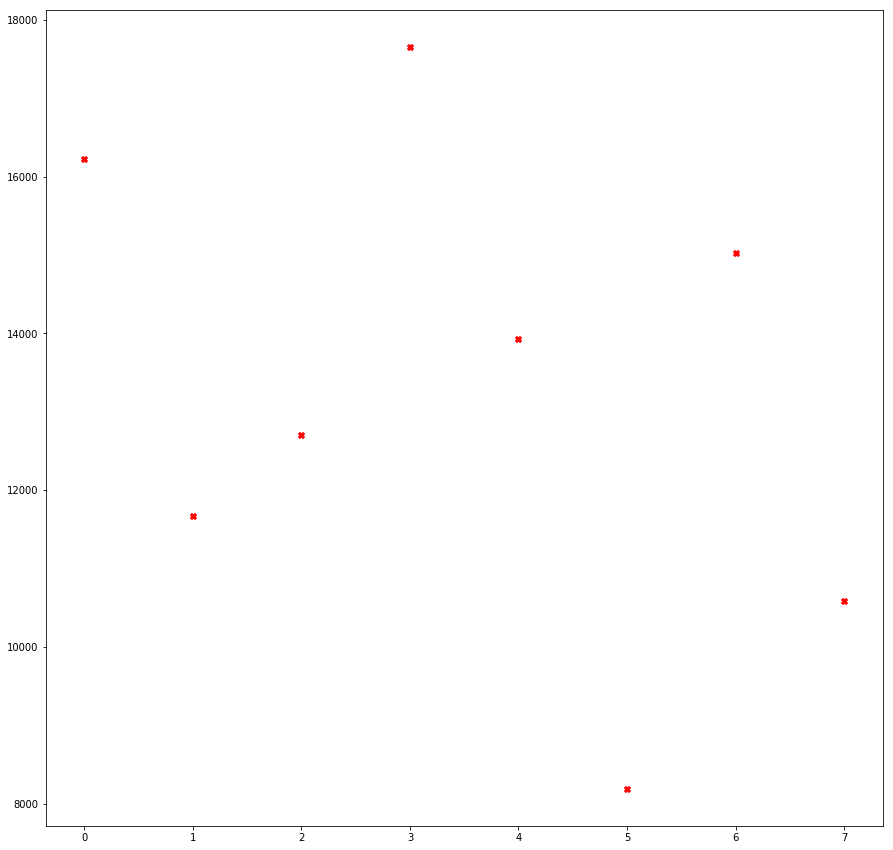

In [14]:
# plotting the figure
plt.figure(figsize=(15,15))

plt.scatter(num_of_centers,centers, marker="X", color='r')
plt.savefig('8_clusters.png') 
plt.show()


In [15]:
# we can also pass an array of values to predict
kmeans_model.predict(13000)


array([2], dtype=int32)

## Predicting and Clustering based on Max DEMAND (monthly) data

In [16]:
#
path="/home/yash/Work/training/df/hourly/UP17"

#Looping through all the remaining 11 months dataset for UP state to find max demand of each month
for file in sorted(os.listdir(path)):
    
    fn=os.path.join(path,file)
    m=pd.read_excel(fn,"01")  
    m=m.iloc[3:27,:]
    m
    wb = load_workbook(fn)
    
    #For each looped month append the Max Demand of each month to a1 list 
    for sheet in wb.worksheets:
        sn=str(sheet.title)
        if(sn=="Sheet1"):
            break
        df=pd.read_excel(fn,sn)
        s=df.iloc[3:27,:]
        m=m.append(s)
        
        
    a1.append(m.fillna(0).values.max())
    


In [17]:
#print the list which consists of Max Demand of 12 months 
a1

[14344.381249999999,
 14132.61,
 16110.445,
 17332.4675,
 18645.6445,
 18827.431,
 18704.0925,
 20273.565,
 20006.682,
 17966.36,
 14291.53,
 14762.23]

In [18]:
#converting list into array
g=np.asarray(a1)

In [19]:
g

array([14344.38125, 14132.61   , 16110.445  , 17332.4675 , 18645.6445 ,
       18827.431  , 18704.0925 , 20273.565  , 20006.682  , 17966.36   ,
       14291.53   , 14762.23   ])

In [20]:
#checking if conversion happened correctly
print(type(g))

<class 'numpy.ndarray'>


In [21]:
#array of 12 natural numbers
h=np.arange(12)
h

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
#combining the above two 1D array into a single 2D array
k=np.vstack((h, g)).T
k

array([[0.00000000e+00, 1.43443812e+04],
       [1.00000000e+00, 1.41326100e+04],
       [2.00000000e+00, 1.61104450e+04],
       [3.00000000e+00, 1.73324675e+04],
       [4.00000000e+00, 1.86456445e+04],
       [5.00000000e+00, 1.88274310e+04],
       [6.00000000e+00, 1.87040925e+04],
       [7.00000000e+00, 2.02735650e+04],
       [8.00000000e+00, 2.00066820e+04],
       [9.00000000e+00, 1.79663600e+04],
       [1.00000000e+01, 1.42915300e+04],
       [1.10000000e+01, 1.47622300e+04]])

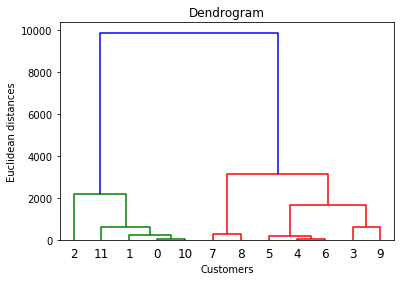

In [23]:
#Making a graph to check optimal number of cluster in case of hierarchal clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(k, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



In [24]:
# importing library to perform hierarchal clustering 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'mahalanobis', linkage = 'average')
#affinity signifies distance metric is used
#ward is same as above
y_hc = hc.fit_predict(k)


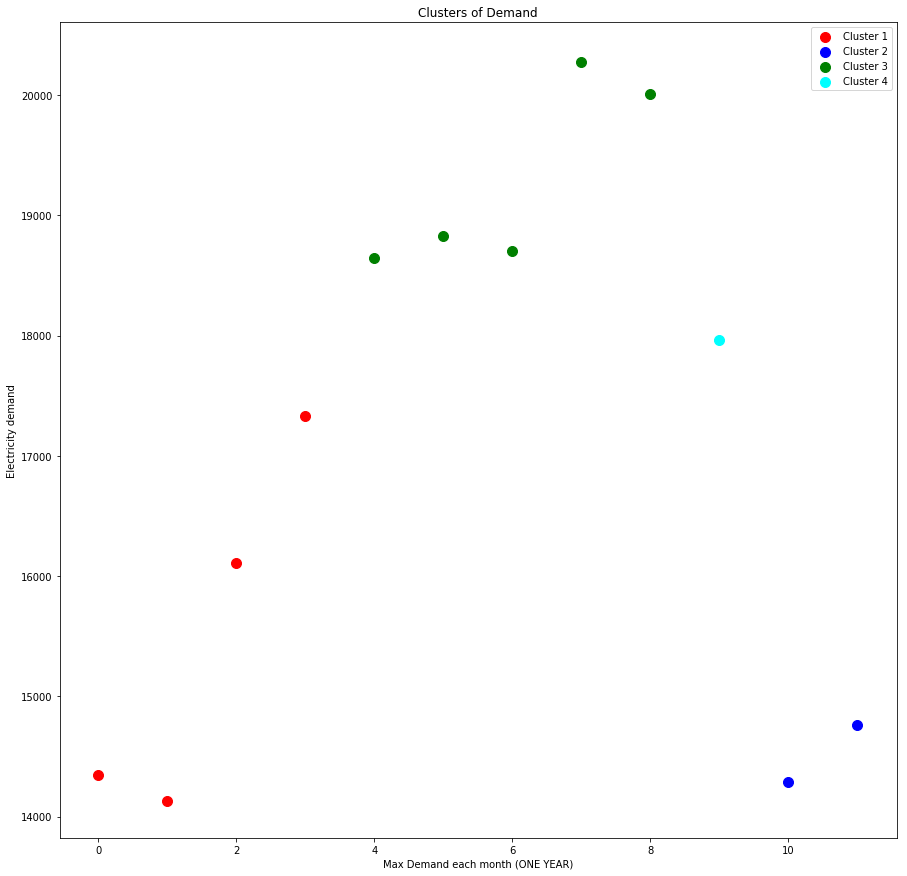

In [25]:
#plotting the graph
plt.figure(figsize=(15,15))
plt.scatter(k[y_hc == 0, 0], k[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(k[y_hc == 1, 0], k[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(k[y_hc == 2, 0], k[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(k[y_hc == 3, 0], k[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Demand')
plt.xlabel('Max Demand each month (ONE YEAR)')
plt.ylabel('Electricity demand')
plt.legend()
plt.savefig('Max_DEMAND_Monthly.png')

plt.show()

## Clustering and Predicting Mean Demand On Hourly Basis For Month of JAN

In [26]:
#initializing train dataframe from data of first day of JAN month
train=pd.read_excel("/home/yash/Work/training/df/hourly/up1.xlsx","1")
train=train.iloc[3:27,:]

In [27]:
# Load the excel for month JAN 2017
wb = load_workbook(r"/home/yash/Work/training/df/hourly/up1.xlsx")

#iterate through sheets and concatenate the data of all 31 days in a single dataframe train to 
#find avg DEMAND for a particular timeblock

for sheet in wb.worksheets[1:]:
    sn=str(sheet.title)
    if(sn=="Sheet1"):
        break
    df=pd.read_excel("/home/yash/Work/training/df/hourly/up1.xlsx",sn)
    s=df.iloc[3:27,:]
    train=pd.concat([train,s],axis=1)
    #Dropping all the unneccessary columns
    train=train.drop('Unnamed: 1',1)
    train=train.drop('Unnamed: 2',1)
    train=train.drop('Unnamed: 3',1)
    train=train.drop('Unnamed: 4',1)
    train=train.drop('Unnamed: 5',1)
    train=train.drop('Unnamed: 6',1)
    train=train.drop('Unnamed: 7',1)
    train=train.drop('Unnamed: 8',1)
    train=train.drop('Unnamed: 9',1)
    train=train.drop('Unnamed: 10',1)
    train=train.drop('Unnamed: 11',1)

            
train

,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,...,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12,Daily Hourly Demand Report,Unnamed: 12
3,1,10914,1,10305.2,1,10378.2,1,10923.8,1,10678.6,...,1,6668.02,1,9178.73,1,10482.7,1,10211.5,1,10350.9
4,2,10429.7,2,10196.6,2,10474.5,2,10415.4,2,10742,...,2,6911.51,2,9436.93,2,10144.1,2,9796.98,2,10089.5
5,3,10334.7,3,10151.7,3,10347.2,3,10581.9,3,10365.5,...,3,6806.76,3,9179.27,3,9821.4,3,9886.93,3,10112.1
6,4,10415.7,4,9960.06,4,10335.6,4,10584.8,4,10326,...,4,6674.53,4,8949.59,4,10244.6,4,9949.85,4,10012.4
7,5,10800.2,5,10278,5,10524.9,5,11115.5,5,10640.6,...,5,6512.9,5,9176.63,5,10257.3,5,10235.3,5,10390.5
8,6,12114.1,6,11441.1,6,11710.5,6,11783.4,6,11535.3,...,6,6956.79,6,9949.1,6,10984.7,6,11222,6,11213.1
9,7,12815.2,7,12623.2,7,11894.3,7,11673.4,7,11551.7,...,7,7741.79,7,10604.5,7,11178.1,7,11462.9,7,11957.6
10,8,12808.4,8,13437.1,8,12693.2,8,12680.6,8,12656.6,...,8,8172.74,8,11057.7,8,11780.4,8,12027,8,12135.8
11,9,13293.1,9,13152.3,9,13437,9,13389.2,9,12883.7,...,9,8116.56,9,10961.5,9,11566.2,9,11744.4,9,11513.4
12,10,12757.8,10,12693.9,10,12833.2,10,12614.9,10,13305.7,...,10,7962.8,10,10700.2,10,11843.8,10,11888.4,10,11572.6


In [28]:
#Removing the repetitive column
train=train.drop('Daily Hourly Demand Report',1)
train

,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,...,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12
3,10914,10305.2,10378.2,10923.8,10678.6,10898.2,9742.32,10243.7,10423.6,10193.2,...,11138,10998.2,10877.6,11004.9,10178.2,6668.02,9178.73,10482.7,10211.5,10350.9
4,10429.7,10196.6,10474.5,10415.4,10742,10474.1,9283.19,9867.77,10190.9,10044.2,...,10860.5,10748.8,10820.7,11049.2,10139.2,6911.51,9436.93,10144.1,9796.98,10089.5
5,10334.7,10151.7,10347.2,10581.9,10365.5,10422.9,9235.84,9726.05,10098.3,9882.11,...,10870.3,10683.9,10933,10816.3,10057.9,6806.76,9179.27,9821.4,9886.93,10112.1
6,10415.7,9960.06,10335.6,10584.8,10326,10363.5,9089.02,9636.23,10092.9,9931.73,...,11755.2,10600.1,11050.5,10841.1,10166.6,6674.53,8949.59,10244.6,9949.85,10012.4
7,10800.2,10278,10524.9,11115.5,10640.6,10944.9,8905.68,9760.47,10395.6,10234.5,...,11699.4,11148.6,11841.3,11473.1,10725.2,6512.9,9176.63,10257.3,10235.3,10390.5
8,12114.1,11441.1,11710.5,11783.4,11535.3,11262.9,9008.58,10545.8,11603,11190.4,...,12204.4,12197.8,12358.9,12549.2,11480.3,6956.79,9949.1,10984.7,11222,11213.1
9,12815.2,12623.2,11894.3,11673.4,11551.7,12173.3,9820.58,10864,12084,11727.5,...,13129.4,12813.4,13080.8,13246.2,13167.4,7741.79,10604.5,11178.1,11462.9,11957.6
10,12808.4,13437.1,12693.2,12680.6,12656.6,12718.4,9902.62,11238.9,12744.3,12413.6,...,13576.6,13377.2,13912.8,13565.7,13833.9,8172.74,11057.7,11780.4,12027,12135.8
11,13293.1,13152.3,13437,13389.2,12883.7,12549.9,9722.67,11670.9,12052.8,11544.6,...,13361.2,13451.1,13203.2,13391.1,14344.4,8116.56,10961.5,11566.2,11744.4,11513.4
12,12757.8,12693.9,12833.2,12614.9,13305.7,12607.8,10789.1,11738.3,12408,12820.2,...,12911.4,12957.8,12848.2,12788.6,14010.7,7962.8,10700.2,11843.8,11888.4,11572.6


In [29]:
#Introducing a new column which stores average demand for each timeblock
train['AVGhourly']=0
train

,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,...,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,AVGhourly
3,10914,10305.2,10378.2,10923.8,10678.6,10898.2,9742.32,10243.7,10423.6,10193.2,...,10998.2,10877.6,11004.9,10178.2,6668.02,9178.73,10482.7,10211.5,10350.9,0
4,10429.7,10196.6,10474.5,10415.4,10742,10474.1,9283.19,9867.77,10190.9,10044.2,...,10748.8,10820.7,11049.2,10139.2,6911.51,9436.93,10144.1,9796.98,10089.5,0
5,10334.7,10151.7,10347.2,10581.9,10365.5,10422.9,9235.84,9726.05,10098.3,9882.11,...,10683.9,10933,10816.3,10057.9,6806.76,9179.27,9821.4,9886.93,10112.1,0
6,10415.7,9960.06,10335.6,10584.8,10326,10363.5,9089.02,9636.23,10092.9,9931.73,...,10600.1,11050.5,10841.1,10166.6,6674.53,8949.59,10244.6,9949.85,10012.4,0
7,10800.2,10278,10524.9,11115.5,10640.6,10944.9,8905.68,9760.47,10395.6,10234.5,...,11148.6,11841.3,11473.1,10725.2,6512.9,9176.63,10257.3,10235.3,10390.5,0
8,12114.1,11441.1,11710.5,11783.4,11535.3,11262.9,9008.58,10545.8,11603,11190.4,...,12197.8,12358.9,12549.2,11480.3,6956.79,9949.1,10984.7,11222,11213.1,0
9,12815.2,12623.2,11894.3,11673.4,11551.7,12173.3,9820.58,10864,12084,11727.5,...,12813.4,13080.8,13246.2,13167.4,7741.79,10604.5,11178.1,11462.9,11957.6,0
10,12808.4,13437.1,12693.2,12680.6,12656.6,12718.4,9902.62,11238.9,12744.3,12413.6,...,13377.2,13912.8,13565.7,13833.9,8172.74,11057.7,11780.4,12027,12135.8,0
11,13293.1,13152.3,13437,13389.2,12883.7,12549.9,9722.67,11670.9,12052.8,11544.6,...,13451.1,13203.2,13391.1,14344.4,8116.56,10961.5,11566.2,11744.4,11513.4,0
12,12757.8,12693.9,12833.2,12614.9,13305.7,12607.8,10789.1,11738.3,12408,12820.2,...,12957.8,12848.2,12788.6,14010.7,7962.8,10700.2,11843.8,11888.4,11572.6,0


In [30]:
#Calculating average demand for each timeblock ,looping through all 24 hrs
for i in range(0,24):
    train.iloc[i,31]=train.iloc[i,:31].sum()/31
    i=i+1
    
train

,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,...,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,AVGhourly
3,10914,10305.2,10378.2,10923.8,10678.6,10898.2,9742.32,10243.7,10423.6,10193.2,...,10998.2,10877.6,11004.9,10178.2,6668.02,9178.73,10482.7,10211.5,10350.9,10586.724234
4,10429.7,10196.6,10474.5,10415.4,10742,10474.1,9283.19,9867.77,10190.9,10044.2,...,10748.8,10820.7,11049.2,10139.2,6911.51,9436.93,10144.1,9796.98,10089.5,10386.614379
5,10334.7,10151.7,10347.2,10581.9,10365.5,10422.9,9235.84,9726.05,10098.3,9882.11,...,10683.9,10933,10816.3,10057.9,6806.76,9179.27,9821.4,9886.93,10112.1,10288.335573
6,10415.7,9960.06,10335.6,10584.8,10326,10363.5,9089.02,9636.23,10092.9,9931.73,...,10600.1,11050.5,10841.1,10166.6,6674.53,8949.59,10244.6,9949.85,10012.4,10357.046048
7,10800.2,10278,10524.9,11115.5,10640.6,10944.9,8905.68,9760.47,10395.6,10234.5,...,11148.6,11841.3,11473.1,10725.2,6512.9,9176.63,10257.3,10235.3,10390.5,10694.177401
8,12114.1,11441.1,11710.5,11783.4,11535.3,11262.9,9008.58,10545.8,11603,11190.4,...,12197.8,12358.9,12549.2,11480.3,6956.79,9949.1,10984.7,11222,11213.1,11468.730766
9,12815.2,12623.2,11894.3,11673.4,11551.7,12173.3,9820.58,10864,12084,11727.5,...,12813.4,13080.8,13246.2,13167.4,7741.79,10604.5,11178.1,11462.9,11957.6,12080.138903
10,12808.4,13437.1,12693.2,12680.6,12656.6,12718.4,9902.62,11238.9,12744.3,12413.6,...,13377.2,13912.8,13565.7,13833.9,8172.74,11057.7,11780.4,12027,12135.8,12605.888919
11,13293.1,13152.3,13437,13389.2,12883.7,12549.9,9722.67,11670.9,12052.8,11544.6,...,13451.1,13203.2,13391.1,14344.4,8116.56,10961.5,11566.2,11744.4,11513.4,12493.978653
12,12757.8,12693.9,12833.2,12614.9,13305.7,12607.8,10789.1,11738.3,12408,12820.2,...,12957.8,12848.2,12788.6,14010.7,7962.8,10700.2,11843.8,11888.4,11572.6,12443.351387


In [31]:
#inserting hours in  day column
train.insert(0, 'Hours_in_Day', range(1,1 + len(train)))
train

,Hours_in_Day,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,...,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,Unnamed: 12,AVGhourly
3,1,10914,10305.2,10378.2,10923.8,10678.6,10898.2,9742.32,10243.7,10423.6,...,10998.2,10877.6,11004.9,10178.2,6668.02,9178.73,10482.7,10211.5,10350.9,10586.724234
4,2,10429.7,10196.6,10474.5,10415.4,10742,10474.1,9283.19,9867.77,10190.9,...,10748.8,10820.7,11049.2,10139.2,6911.51,9436.93,10144.1,9796.98,10089.5,10386.614379
5,3,10334.7,10151.7,10347.2,10581.9,10365.5,10422.9,9235.84,9726.05,10098.3,...,10683.9,10933,10816.3,10057.9,6806.76,9179.27,9821.4,9886.93,10112.1,10288.335573
6,4,10415.7,9960.06,10335.6,10584.8,10326,10363.5,9089.02,9636.23,10092.9,...,10600.1,11050.5,10841.1,10166.6,6674.53,8949.59,10244.6,9949.85,10012.4,10357.046048
7,5,10800.2,10278,10524.9,11115.5,10640.6,10944.9,8905.68,9760.47,10395.6,...,11148.6,11841.3,11473.1,10725.2,6512.9,9176.63,10257.3,10235.3,10390.5,10694.177401
8,6,12114.1,11441.1,11710.5,11783.4,11535.3,11262.9,9008.58,10545.8,11603,...,12197.8,12358.9,12549.2,11480.3,6956.79,9949.1,10984.7,11222,11213.1,11468.730766
9,7,12815.2,12623.2,11894.3,11673.4,11551.7,12173.3,9820.58,10864,12084,...,12813.4,13080.8,13246.2,13167.4,7741.79,10604.5,11178.1,11462.9,11957.6,12080.138903
10,8,12808.4,13437.1,12693.2,12680.6,12656.6,12718.4,9902.62,11238.9,12744.3,...,13377.2,13912.8,13565.7,13833.9,8172.74,11057.7,11780.4,12027,12135.8,12605.888919
11,9,13293.1,13152.3,13437,13389.2,12883.7,12549.9,9722.67,11670.9,12052.8,...,13451.1,13203.2,13391.1,14344.4,8116.56,10961.5,11566.2,11744.4,11513.4,12493.978653
12,10,12757.8,12693.9,12833.2,12614.9,13305.7,12607.8,10789.1,11738.3,12408,...,12957.8,12848.2,12788.6,14010.7,7962.8,10700.2,11843.8,11888.4,11572.6,12443.351387


In [32]:
#obtaining a 2D array to give it as a input to clustering algo
X1=train.iloc[:,[0,32]].values
X1

array([[1.00000000e+00, 1.05867242e+04],
       [2.00000000e+00, 1.03866144e+04],
       [3.00000000e+00, 1.02883356e+04],
       [4.00000000e+00, 1.03570460e+04],
       [5.00000000e+00, 1.06941774e+04],
       [6.00000000e+00, 1.14687308e+04],
       [7.00000000e+00, 1.20801389e+04],
       [8.00000000e+00, 1.26058889e+04],
       [9.00000000e+00, 1.24939787e+04],
       [1.00000000e+01, 1.24433514e+04],
       [1.10000000e+01, 1.22781380e+04],
       [1.20000000e+01, 1.18038413e+04],
       [1.30000000e+01, 1.17402752e+04],
       [1.40000000e+01, 1.14139936e+04],
       [1.50000000e+01, 1.13081507e+04],
       [1.60000000e+01, 1.12515495e+04],
       [1.70000000e+01, 1.13616584e+04],
       [1.80000000e+01, 1.18810793e+04],
       [1.90000000e+01, 1.29539715e+04],
       [2.00000000e+01, 1.26255472e+04],
       [2.10000000e+01, 1.23263455e+04],
       [2.20000000e+01, 1.24032001e+04],
       [2.30000000e+01, 1.18485087e+04],
       [2.40000000e+01, 1.12734857e+04]])

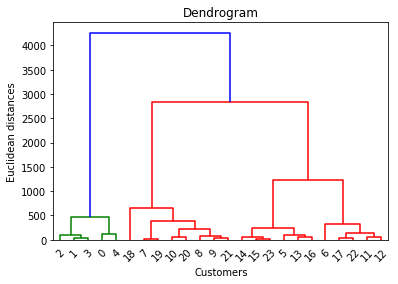

In [33]:
#Checking optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [34]:
# performing hierarchal clustering on mean demand on hourly basis
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#affinity signifies euclidean distance is used
#ward is same as above
y_hc = hc.fit_predict(X1)

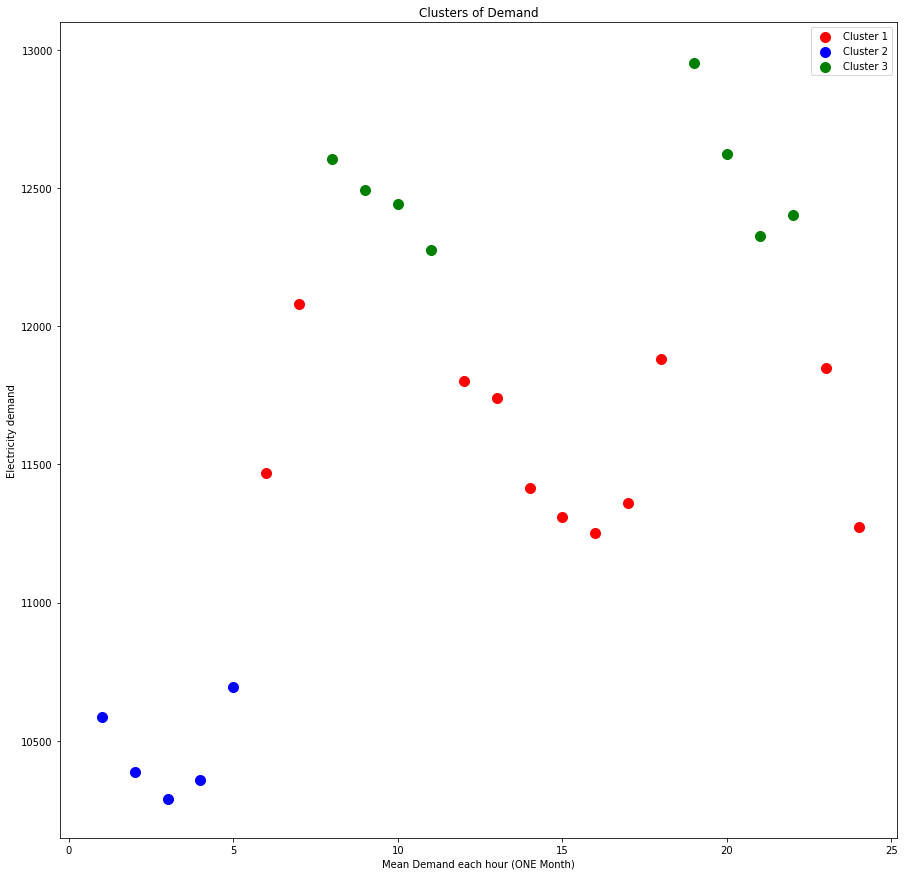

In [35]:
#plotting the graph
plt.figure(figsize=(15,15))
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.title('Clusters of Demand')
plt.xlabel('Mean Demand each hour (ONE Month)')
plt.ylabel('Electricity demand')
plt.legend()
plt.savefig('Mean_demand_hourly.png')

plt.show()

## Clustering and Predicting Hourly Demand in a Year based count of demand data

In [36]:
# importing clustering library
from sklearn.cluster import KMeans

In [37]:
wcss1=[]

In [38]:
X1=train1.iloc[:,1].dropna().values
X1=X1.reshape(len(X1),1)
X1

array([[10914.02],
       [10429.7125],
       [10334.7175],
       ...,
       [13070.75],
       [12040.630000000001],
       [11188.95]], dtype=object)

In [39]:
# Using the elbow method  to find optimal number of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)

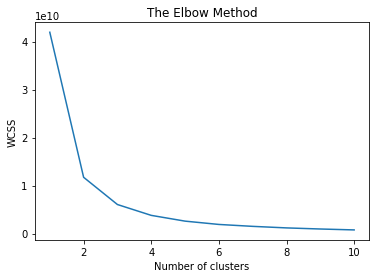

In [40]:
# plotting the elbow graph
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
# fitting the data in 8 clusters 
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
kmeans.cluster_centers_

array([[12757.27015441],
       [15169.04191426],
       [11711.50183106],
       [17752.40555158],
       [ 8191.87604894],
       [14008.58711008],
       [10607.98012214],
       [16384.17311265]])

In [42]:
# consists of 8 natural numbers
num=np.arange(8)
num

array([0, 1, 2, 3, 4, 5, 6, 7])

In [43]:
# helps in performing iteration
from itertools import cycle

In [44]:
# making a list which consists of count of data assigned to each of the 8 respective centroid 
c=[]
for k in range(8):
    c.append(len(X1[y_kmeans1==k,0]))
    
c

[1510, 1206, 1889, 602, 63, 1384, 1118, 988]

In [45]:
#converting above list into array as these algos work on arrays only
n=np.asarray(c)
print(type(n))

<class 'numpy.ndarray'>


In [46]:
# xt is a list consists of 8 centroids values
xt=[]
xt=kmeans.cluster_centers_.tolist()
xt

[[12757.270154413058],
 [15169.041914256026],
 [11711.501831059311],
 [17752.405551578075],
 [8191.876048941798],
 [14008.58711008297],
 [10607.980122144327],
 [16384.17311265244]]

In [47]:
# combining the above two list into one
ct=[]
ct=[c,xt]

ct

[[1510, 1206, 1889, 602, 63, 1384, 1118, 988],
 [[12757.270154413058],
  [15169.041914256026],
  [11711.501831059311],
  [17752.405551578075],
  [8191.876048941798],
  [14008.58711008297],
  [10607.980122144327],
  [16384.17311265244]]]

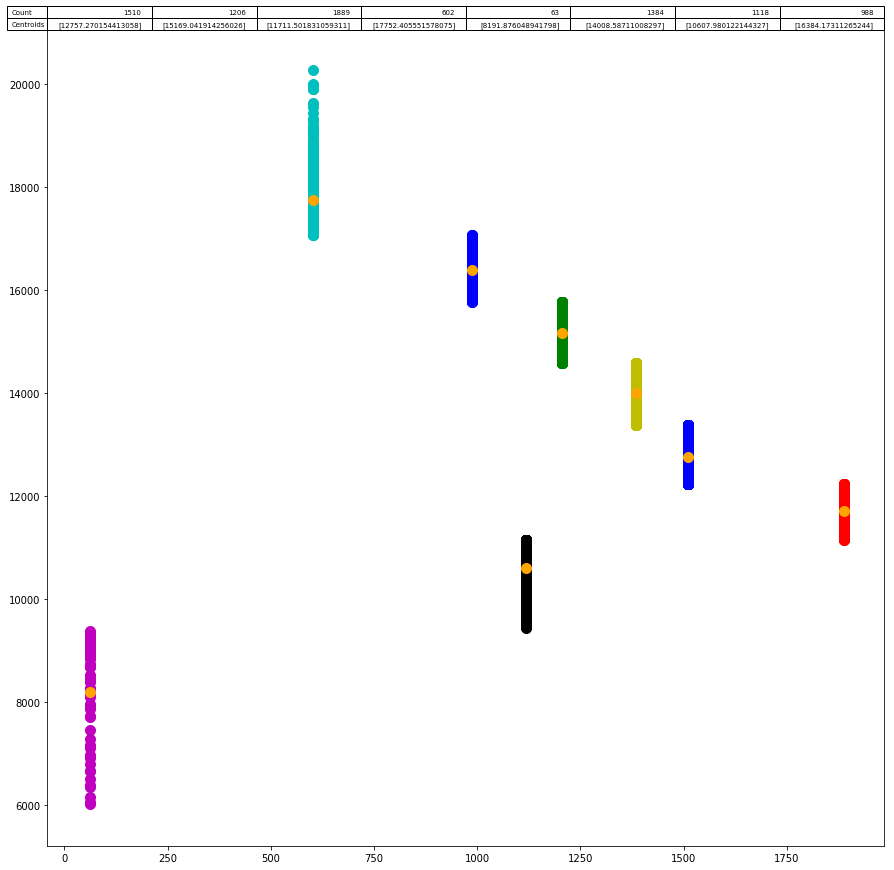

In [48]:
#Defining size of plot
fig = plt.figure(figsize=(15,15))

#calling subplot so to make various plots in same axis
ax1 = fig.add_subplot(111)

#group of colors
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')



for k, col in zip(range(8), colors):
    v=np.array(X1[y_kmeans1==k,0])
    
#For each data point plot it which is assigned to kth centroid with respective to count of values in that cluster
#Plotting clusters and centroids on the same axis 
    for i in range(len(X1[y_kmeans1==k,0])):
       
        ax1.scatter(n[k],v[i],s = 100, c = col , label = 'Cluster 1')
    
    ax1.scatter(n[k],kmeans.cluster_centers_[k],s = 100, c = "orange" , label = 'Cluster 2')

# combining the table consisting of count of data and their respective centroids at top
the_table = ax1.table(cellText=ct,
                      rowLabels=["Count","Centroids"],
                      loc='top')


plt.savefig('Final_Plot.png')
plt.show()

In [60]:
MW=kmeans.cluster_centers_[kmeans_model.predict(15000)-1]
MW

array([[14008.58711008]])

In [61]:
kmeans.cluster_centers_

array([[12757.27015441],
       [15169.04191426],
       [11711.50183106],
       [17752.40555158],
       [ 8191.87604894],
       [14008.58711008],
       [10607.98012214],
       [16384.17311265]])

In [63]:
print(len(y_kmeans1))

8760
